<a href="https://colab.research.google.com/github/Firdausfatihul/MyParsel/blob/master/Datavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=eb776446525e2ca88a853f573acf59e87e828d751eee815303284d53eca3f7b8
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [133]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pingouin as pg
import pandas as pd
import plotly.express as px

In [204]:
# Load data from CSV
data = {
'Company': ['BJTM', 'BJBR', 'BTPS', 'BBTN', 'BNII', 'NISP', 'BTPN', 'BDMN', 'BNGA'],
'Current Price to Book Value': [0.96, 0.97, 2.01, 0.66, 0.6, 0.51, 0.55, 0.6, 0.71],
'Current Price To Free Cashflow (TTM)': [-1.23, -1.39, 8.75, 77.23, -1.34, -1.42, -4.42, -3.26, -1.92],
'Return on Assets (TTM)': [1.5, 1.27, 8.41, 0.76, 0.91, 1.39, 1.48, 1.67, 1.64],
'Return on Equity (TTM)': [13.48, 15.61, 21.17, 11.75, 5.06, 9.72, 8.39, 7.05, 11.16],
'Return on Capital Employed (TTM)': [1.93, 1.62, 10.93, 0.96, 1.26, 1.84, 2.28, 2.37, 2.14],
'Return On Invested Capital (TTM)': [13.2, 8.56, 21.74, 5.09, 3.62, 9.25, 7.4, 7.35, 10.97],
'EV to EBIT (TTM)': [4.66, 7.76, 7.08, 13.41, 14.42, 4.33, 6.58, 5.95, 4.33],
'Net Profit Margin (Annual)(%)': [22.42, 16.9, 33.12, 11.75, 14.14, 26.16, 19.47, 18.99, 26.38],
'3 Year CAGR Price Performance': [18.83, 22.88, 0.93, 14.78, 18.56, -1.48, 9.39, 11.15, 27.34]
}

df = pd.DataFrame(data)

In [170]:
df.head()


,Company,Current Price to Book Value,Current Price To Free Cashflow (TTM),Return on Assets (TTM),Return on Equity (TTM),Return on Capital Employed (TTM),Return On Invested Capital (TTM),EV to EBIT (TTM),Net Profit Margin (Annual)(%),3 Year CAGR Price Performance
0,BJTM,0.96,-1.23,1.50,13.48,1.93,13.20,4.66,22.42,18.83
1,BMAS,3.83,-7.94,0.77,8.45,1.10,8.47,78.43,8.90,129.38
2,BBSI,5.73,-11.99,2.79,3.71,3.45,3.70,120.95,53.55,-
3,BJBR,0.97,-1.39,1.27,15.61,1.62,8.56,7.76,16.90,22.88
4,BANK,8.19,-204.37,-7.97,-10.26,-7.67,-10.27,-79.91,-335.84,115.96


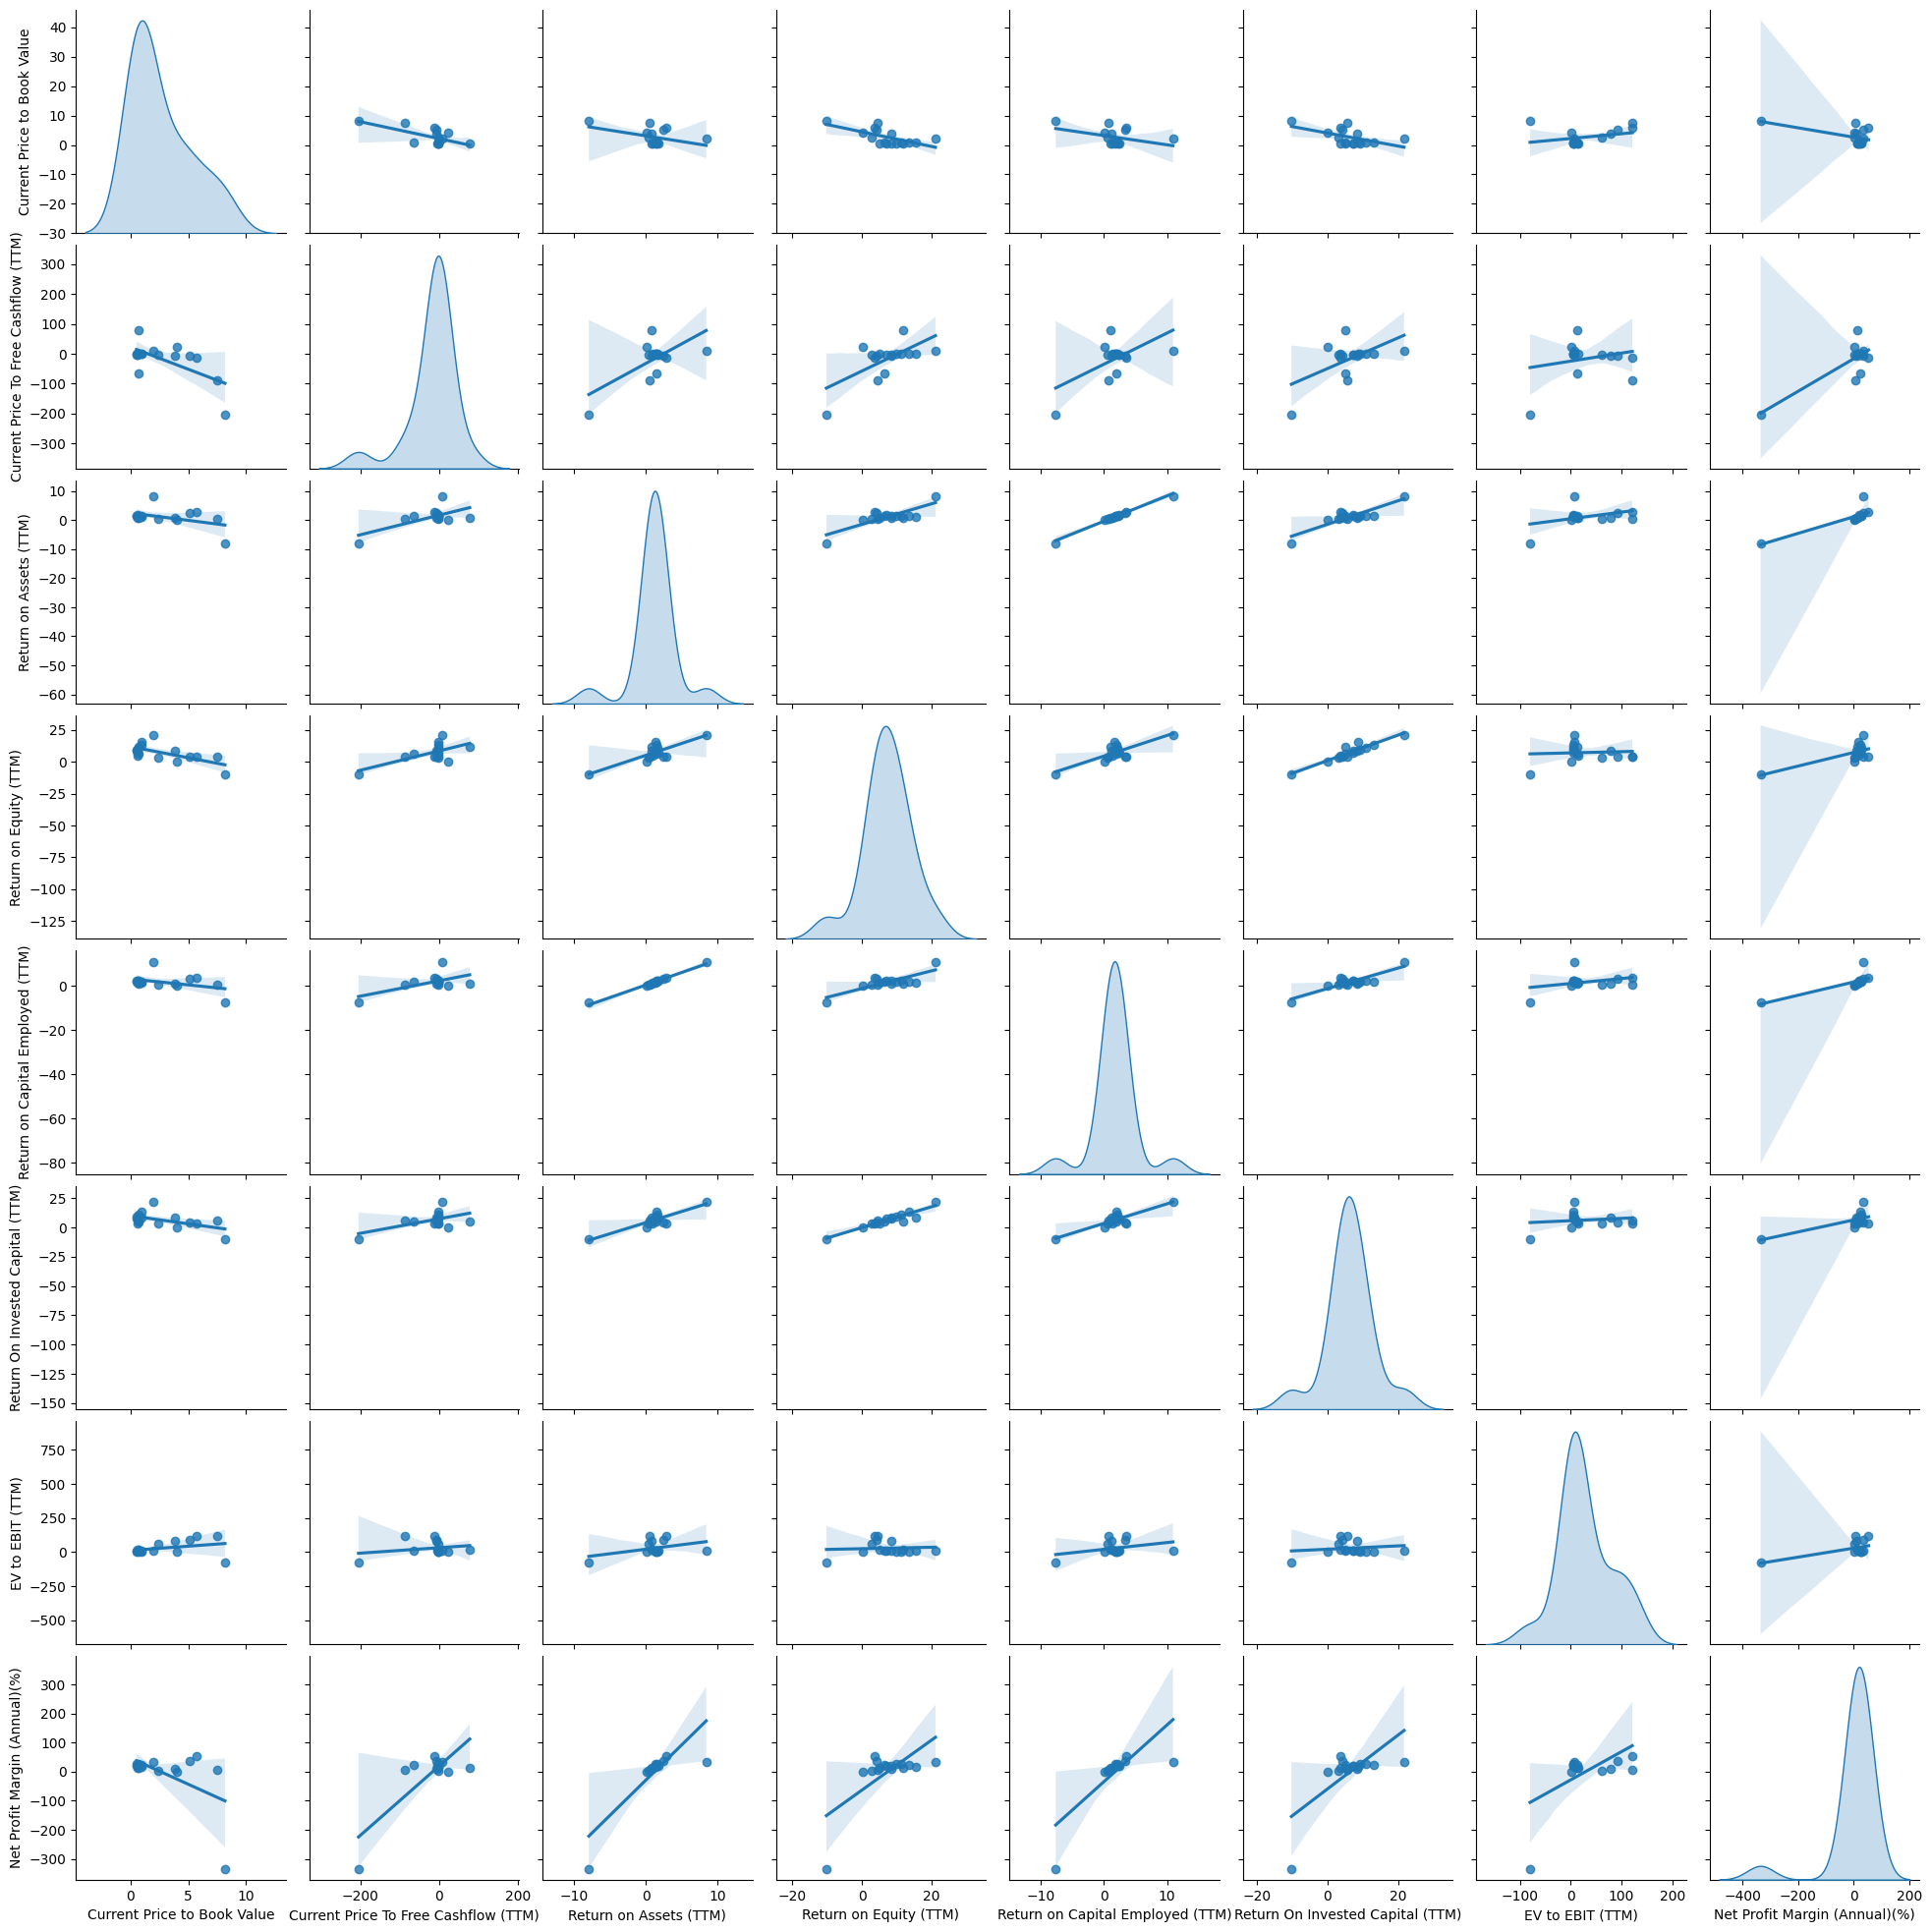

In [171]:
sns.pairplot(df, diag_kind='kde', kind='reg', markers='o')
plt.show()

In [174]:
corr_matrix = df.corr()


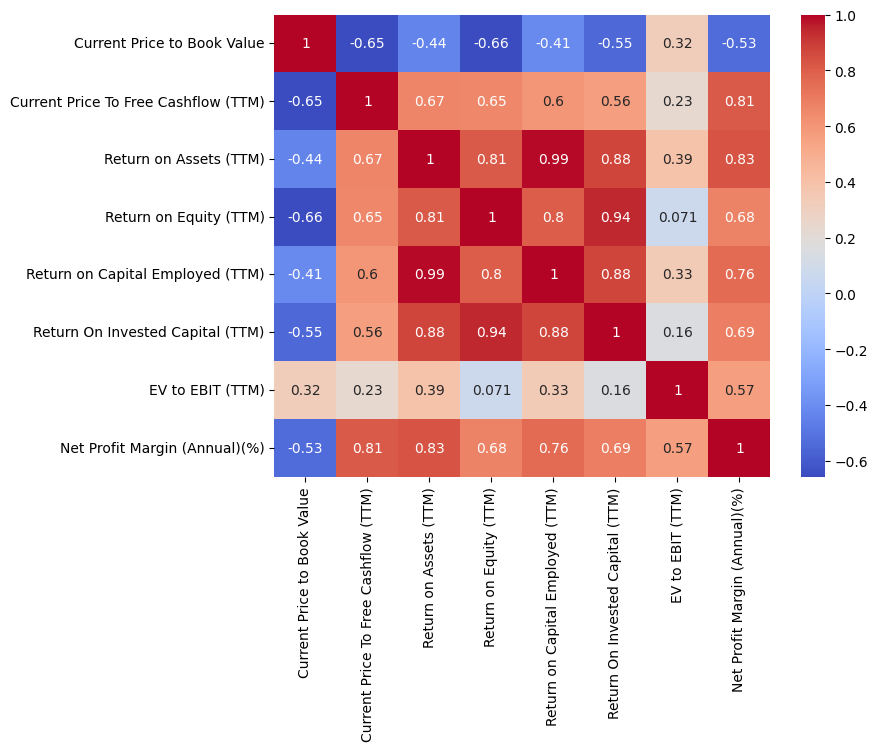

In [175]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

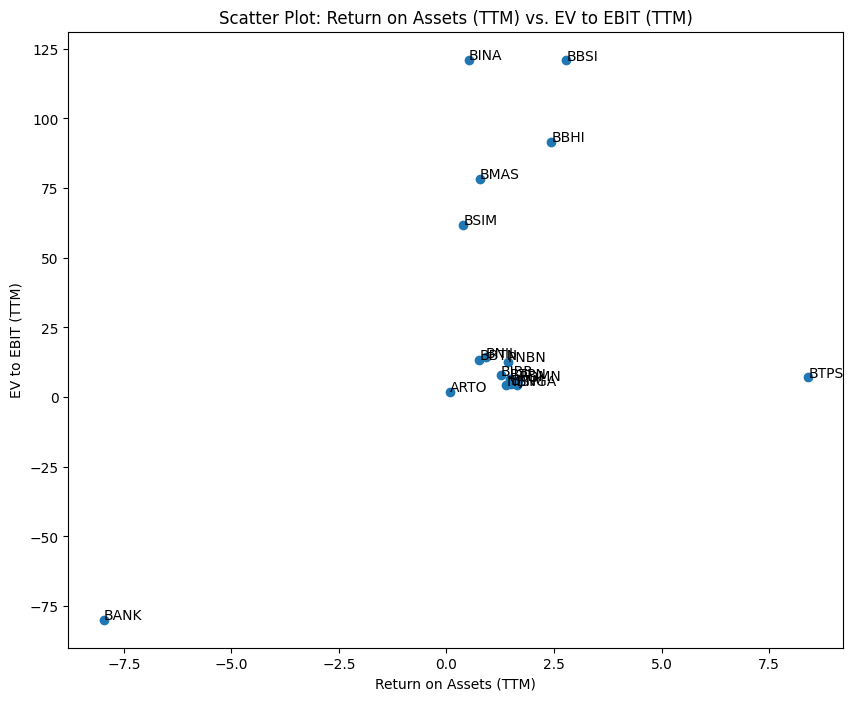

In [183]:
x_column = 'Return on Assets (TTM)'
y_column = 'EV to EBIT (TTM)'
label_offset = 0.25

plt.figure(figsize=(10, 8))
plt.scatter(df[x_column], df[y_column])

for i, company in enumerate(df['Company']):
    plt.text(df[x_column][i] , df[y_column][i], company)

plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Scatter Plot: {x_column} vs. {y_column}')

# Display the scatter plot
plt.show()

In [180]:
spearman_corr_matrix = df.corr(method='spearman')

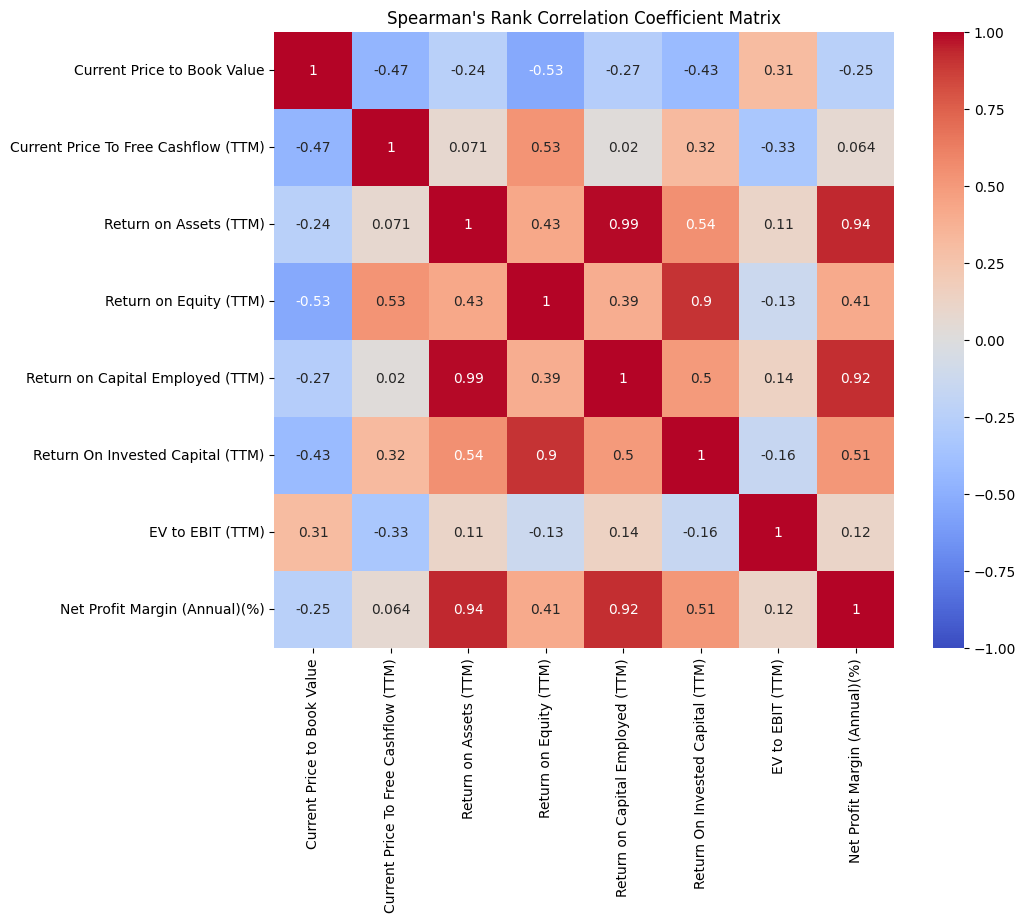

In [181]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Spearman's Rank Correlation Coefficient Matrix")
plt.show()

In [182]:
kendall_corr_matrix = df.corr(method='kendall')

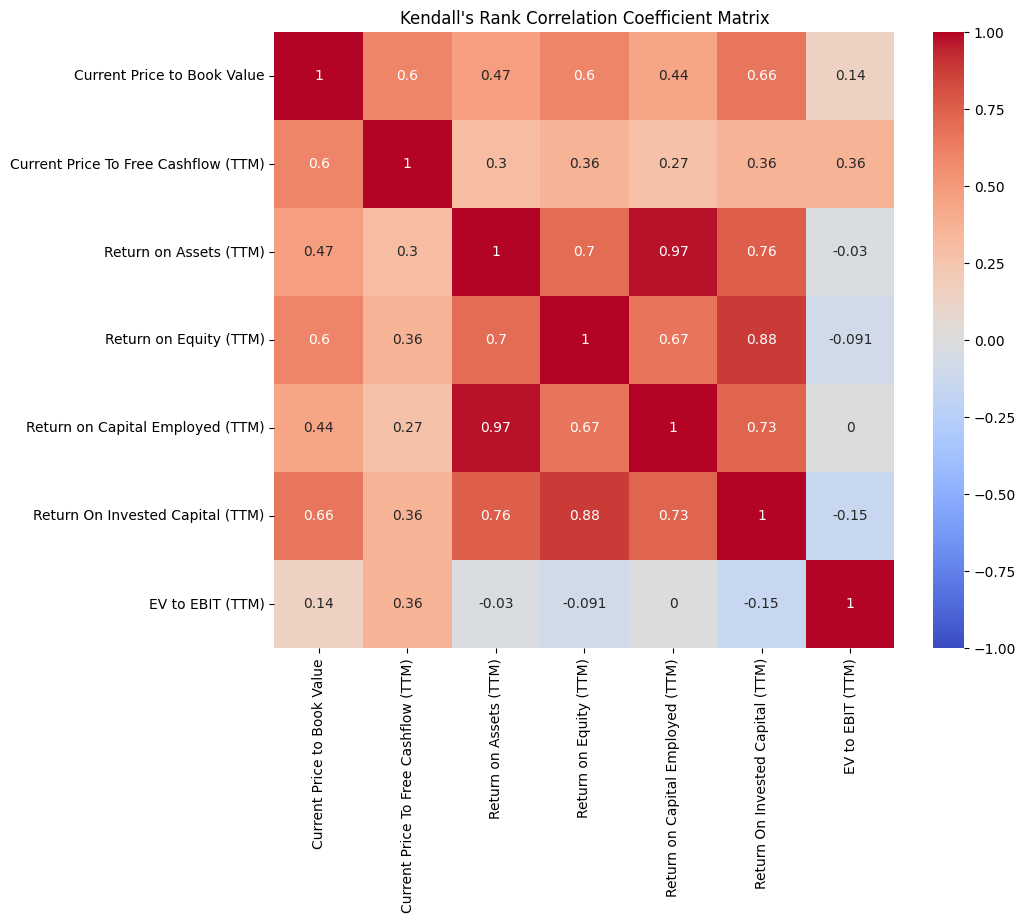

In [161]:
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Kendall's Rank Correlation Coefficient Matrix")
plt.show()

In [184]:
def upper_triangle_mask(corr_matrix):
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    return mask

# Function to plot a heatmap with customizations
def plot_custom_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    
    mask = upper_triangle_mask(corr_matrix)
    
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask,
                annot_kws={"fontsize": 10, "color": 'black'}, linewidths=1)
    
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10, rotation=45)
    plt.title(title, fontsize=14)
    plt.show()

<ipython-input-184-15b7f6aab4a0>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



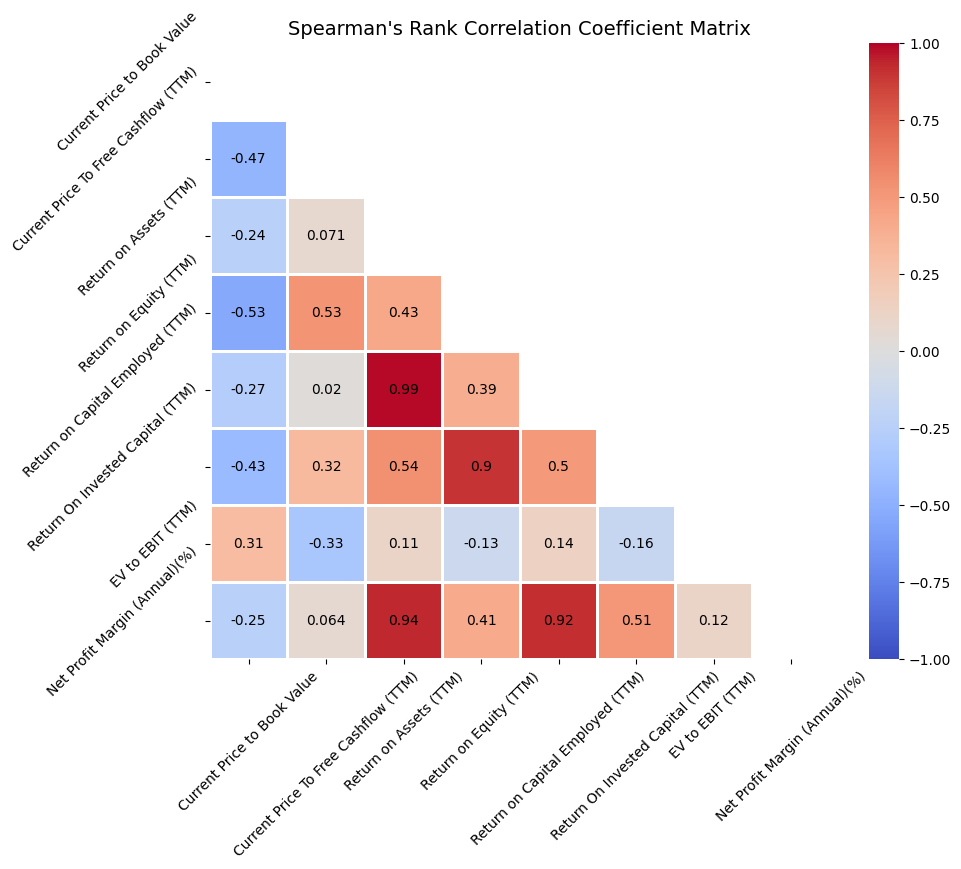

In [185]:
plot_custom_heatmap(spearman_corr_matrix, "Spearman's Rank Correlation Coefficient Matrix")

<ipython-input-184-15b7f6aab4a0>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



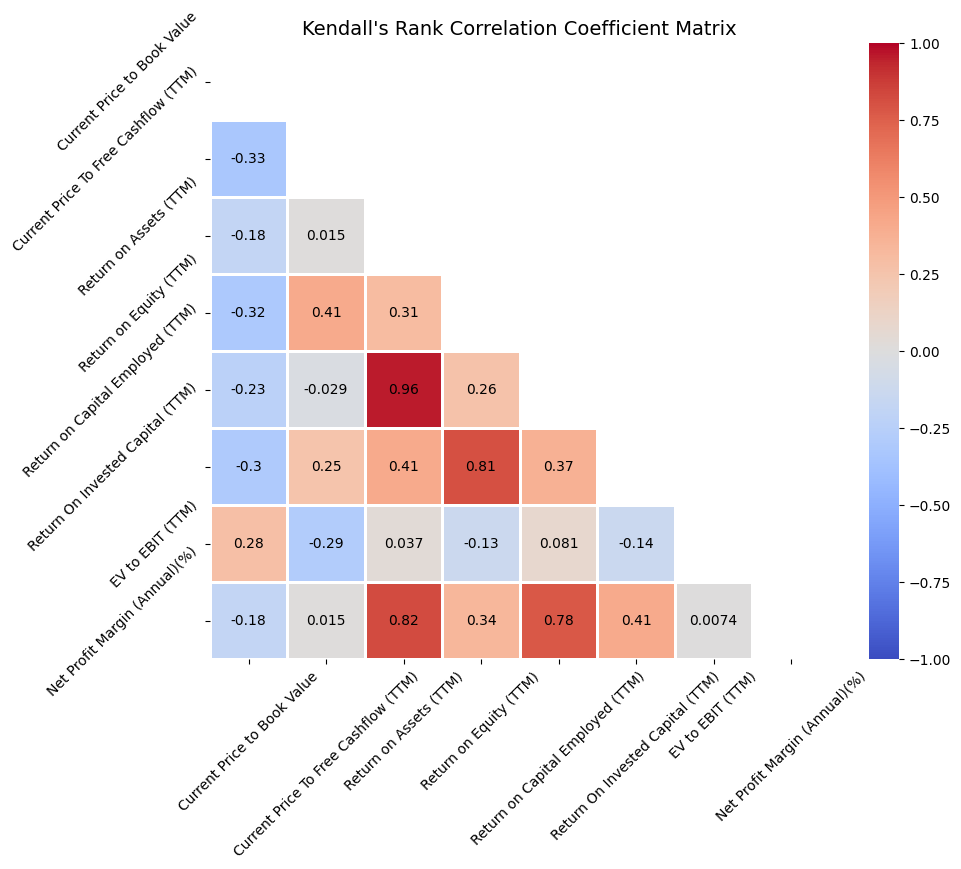

In [186]:
plot_custom_heatmap(kendall_corr_matrix, "Kendall's Rank Correlation Coefficient Matrix")


In [189]:
y = df['EV to EBIT (TTM)']
X = df['Net Profit Margin (Annual)(%)']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       EV to EBIT (TTM)   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     7.069
Date:                Sat, 01 Apr 2023   Prob (F-statistic):             0.0179
Time:                        14:35:44   Log-Likelihood:                -87.135
No. Observations:                  17   AIC:                             178.3
Df Residuals:                      15   BIC:                             179.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=17



In [103]:
partial_corr = pg.partial_corr(data=df, x='Net Profit Margin (TTM)(%)', y='Current PE Ratio (TTM)', covar='Return on Equity (TTM)')
print(partial_corr)


          n         r          CI95%     p-val
pearson  12  0.538215  [-0.09, 0.86]  0.087645


/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


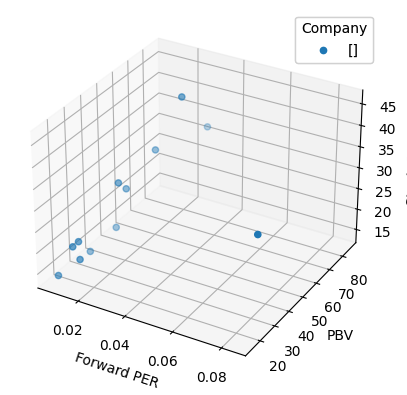

In [131]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['Return on Assets (TTM)'], data['Payout Ratio'], data['Net Profit Margin (TTM)(%)'])
ax.set_xlabel('Forward PER')
ax.set_ylabel('PBV')
ax.set_zlabel('Stock Return')
legend = ax.legend(scatter.legend_elements(), title='Company')
ax.add_artist(legend)
plt.show()

In [208]:
fig = px.scatter_3d(df,
                    x='Net Profit Margin (Annual)(%)',
                    y='EV to EBIT (TTM)',
                    z='3 Year CAGR Price Performance',
                    text='Company',
                    color='Company',
                    size_max=18,
                    opacity=0.7,
                    title='3D Scatter Plot of Financial Metrics')

fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Customize the axes labels
fig.update_layout(scene=dict(xaxis_title='Net Profit Margin (Annual)(%)',
                             yaxis_title='EV to EBIT (TTM)',
                             zaxis_title='3 Year CAGR Price Performance'))

# Show the plot
fig.show()

In [1]:
import plotly.graph_objs as go

# Create the 3D scatter plot
fig = go.Figure()

unique_companies = df['Company'].unique()

for i, company in enumerate(unique_companies):
    company_df = df[df['Company'] == company]
    fig.add_trace(go.Scatter3d(x=company_df['Net Profit Margin (TTM)(%)'],
                               y=company_df['Current PE Ratio (TTM)'],
                               z=company_df['Return on Assets (TTM)'],
                               mode='markers',
                               marker=dict(size=12,
                                           symbol='diamond',  # Change the symbol to 'diamond'
                                           color=color_scale[i % len(color_scale)],  # Cycle through the color_scale
                                           line=dict(width=2, color='DarkSlateGrey')),
                               text=company,
                               name=company))

# Customize the axes labels
fig.update_layout(scene=dict(xaxis_title='Net Profit Margin (TTM)(%)',
                             yaxis_title='Current PE Ratio (TTM)',
                             zaxis_title='Return on Assets (TTM)'))

# Customize the background and grid colors
fig.update_layout(
    plot_bgcolor='rgba(245, 245, 245, 0.5)',
    scene=dict(
        xaxis=dict(
            gridcolor='rgba(200, 200, 200, 0.2)',
            zerolinecolor='rgba(200, 200, 200, 0.2)'),
        yaxis=dict(
            gridcolor='rgba(200, 200, 200, 0.2)',
            zerolinecolor='rgba(200, 200, 200, 0.2)'),
        zaxis=dict(
            gridcolor='rgba(200, 200, 200, 0.2)',
            zerolinecolor='rgba(200, 200, 200, 0.2)')
    )
)

# Show the plot
fig.show()



NameError: ignored